In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\erosb\09-2023 Boat Sales Analysis'

In [4]:
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'boats_wrangled.csv'))

In [5]:
df.dtypes

Price                           object
Boat Type                       object
Manufacturer                    object
Short Description               object
Year Built                       int64
Length                         float64
Width                          float64
Material                        object
Location                        object
Country                         object
Number of views last 7 days      int64
Price_type                      object
Price_num                        int64
Price_adjusted                 float64
Age_Classification              object
Size_Classification             object
dtype: object

In [6]:
df.head()

,Price,Boat Type,Manufacturer,Short Description,Year Built,Length,Width,Material,Location,Country,Number of views last 7 days,Price_type,Price_num,Price_adjusted,Age_Classification,Size_Classification
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,Switzerland,226,CHF,3337,3493.54,Contemporary,Class A
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,Germany,75,EUR,3490,3490.00,Contemporary,Class A
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,Switzerland,124,CHF,3770,3946.85,Unknown,Class A
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,Denmark,64,DKK,25900,3474.90,Contemporary,Class A
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,Germany,58,EUR,3399,3399.00,Contemporary,Class A


#### #2 Prepare data for k-means

In [9]:
#remove categorical variables
df_new = df[['Year Built', 'Length', 'Width', 'Number of views last 7 days', 'Price_adjusted']]

In [10]:
df_new.head()

,Year Built,Length,Width,Number of views last 7 days,Price_adjusted
0,2017,4.00,1.90,226,3493.54
1,2020,4.00,1.50,75,3490.00
2,0,3.69,1.42,124,3946.85
3,2020,3.00,1.00,64,3474.90
4,2019,3.55,1.46,58,3399.00


In [11]:
df.shape

(9852, 16)

In [12]:
df_new.shape

(9852, 5)

In [14]:
df_new.describe()

,Year Built,Length,Width,Number of views last 7 days,Price_adjusted
count,9852.000000,9843.000000,9796.000000,9852.000000,9.852000e+03
mean,1892.782481,11.536811,3.513650,149.416971,3.012466e+05
std,460.991432,5.972986,1.214407,152.025334,9.709786e+05
min,0.000000,1.040000,0.010000,13.000000,3.300000e+03
25%,1996.000000,7.455000,2.540000,70.000000,4.300000e+04
50%,2007.000000,10.220000,3.320000,108.000000,9.220550e+04
75%,2017.000000,13.900000,4.250000,172.000000,2.450000e+05
max,2021.000000,100.000000,25.160000,3263.000000,3.100000e+07


In [15]:
df_new.loc[df_new['Year Built']==0]

,Year Built,Length,Width,Number of views last 7 days,Price_adjusted
2,0,3.69,1.42,124,3946.85
5,0,4.03,1.56,132,3821.22
7,0,3.00,NaN,134,3327.32
11,0,4.13,1.41,145,3643.25
15,0,3.88,1.49,263,4606.40
...,...,...,...,...,...
9840,0,6.50,2.45,550,5234.55
9843,0,4.11,1.73,280,5224.08
9844,0,4.01,1.64,247,5213.61
9845,0,3.99,1.52,150,5182.20


There are 551 listings with unknown year built. Since that is about 5.6% of the total, it is safe to drop the data since it affects the standardization of the year built column.

In [16]:
#drop unknown year built 
df_new = df_new[df_new['Year Built'] != 0]

In [17]:
df_new.describe()

,Year Built,Length,Width,Number of views last 7 days,Price_adjusted
count,9301.000000,9292.000000,9246.000000,9301.000000,9.301000e+03
mean,2004.912698,11.716704,3.552256,150.495001,3.026256e+05
std,16.384805,5.999102,1.212540,154.877301,9.392338e+05
min,1885.000000,1.040000,0.010000,13.000000,3.300000e+03
25%,1999.000000,7.557500,2.550000,70.000000,4.490000e+04
50%,2008.000000,10.500000,3.380000,108.000000,9.500000e+04
75%,2018.000000,14.000000,4.260000,172.000000,2.495000e+05
max,2021.000000,100.000000,25.160000,3263.000000,3.100000e+07


Better. There are some unknown length and width which will mess up the elbow technique. There are not that many unknown values, therefore drop them.

In [28]:
df_new = df_new.dropna()

#### #3 Elbow technique

In [43]:
num_cl = range(1, 15) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [44]:
score = [kmeans[i].fit(df_new).score(df_new) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\erosb\OneDrive\Documents\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\erosb\OneDrive\Documents\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\erosb\OneDrive\Documents\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\erosb\OneDrive\Documents\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

[-8156995997361755.0,
 -3351665118014130.0,
 -1941031372919847.2,
 -1094380800869195.6,
 -746394997948604.4,
 -510179496775894.9,
 -367182132168539.3,
 -273813639074693.7,
 -210272460023993.56,
 -168087102432703.75,
 -133733776408354.73,
 -108420821913506.39,
 -86628101903936.69,
 -69492166472968.13]

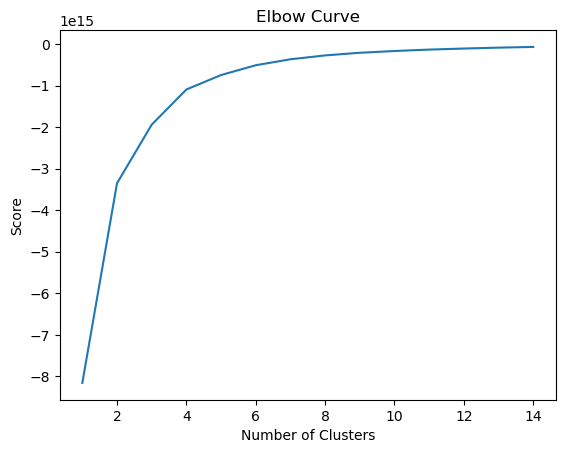

In [45]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### #4 Number of clusters

The curve begins to flatten around 4 clusters so we will use that number.

#### #5 Run k-means algorithm

In [47]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [48]:
# Fit the k-means object to the data.

kmeans.fit(df_new)

C:\Users\erosb\OneDrive\Documents\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

#### #6 Add clusters column

In [52]:
df_new['clusters'] = kmeans.fit_predict(df_new)

C:\Users\erosb\OneDrive\Documents\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\erosb\AppData\Local\Temp\ipykernel_4612\316427919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['clusters'] = kmeans.fit_predict(df_new)


In [53]:
df_new.head()

,Year Built,Length,Width,Number of views last 7 days,Price_adjusted,clusters
0,2017,4.00,1.90,226,3493.54,0
1,2020,4.00,1.50,75,3490.00,0
3,2020,3.00,1.00,64,3474.90,0
4,2019,3.55,1.46,58,3399.00,0
6,1999,6.20,2.38,474,3768.88,0


In [54]:
df_new['clusters'].value_counts()

0    8790
2     383
3      65
1       8
Name: clusters, dtype: int64

#### #7 Visualizations

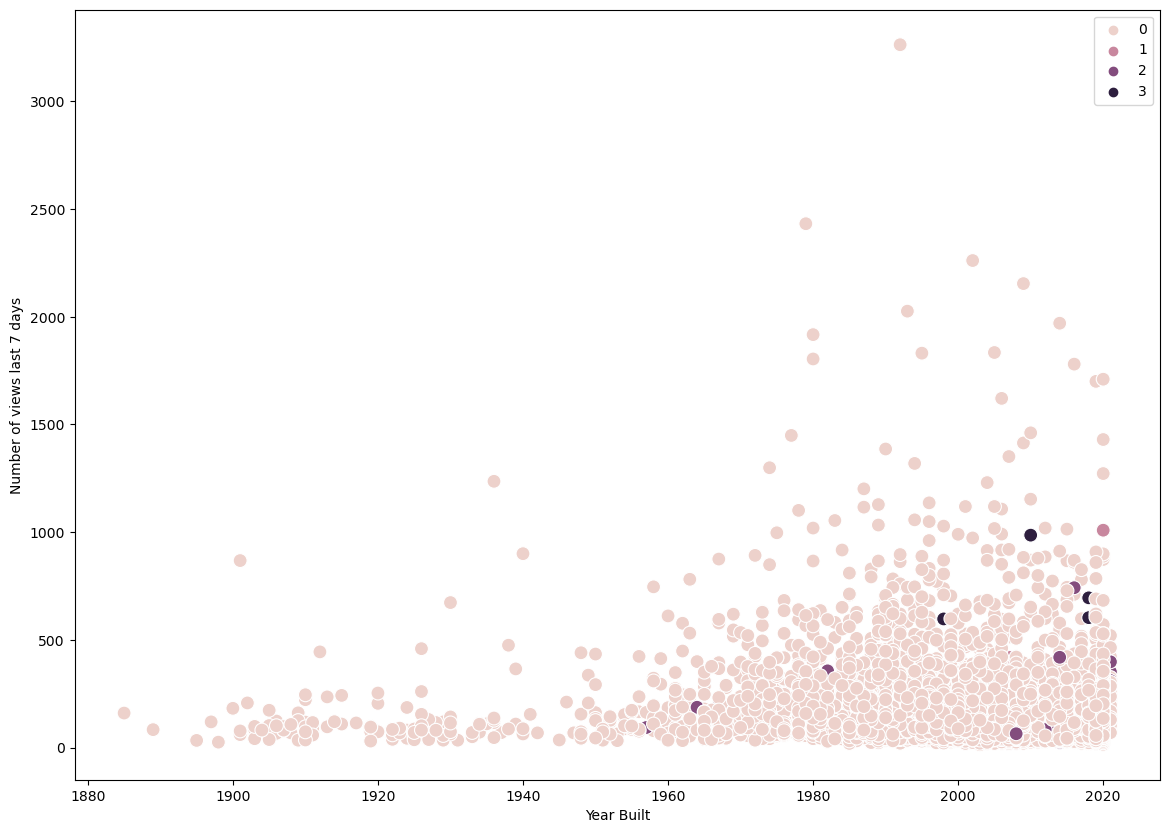

In [56]:
# Plot the clusters for the "Year Built" and "Number of views last 7 days" variables.

plt.figure(figsize=(14,10))
ax = sns.scatterplot(x=df_new['Year Built'], y=df_new['Number of views last 7 days'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Year Built') # Label x-axis.
plt.ylabel('Number of views last 7 days') # Label y-axis.
plt.show()

It is hard to see clusters 1, 2, and 3 because they are all clumped together with cluster 0. This means the majority of listings are boats built after 1960 with less than 500 views. 

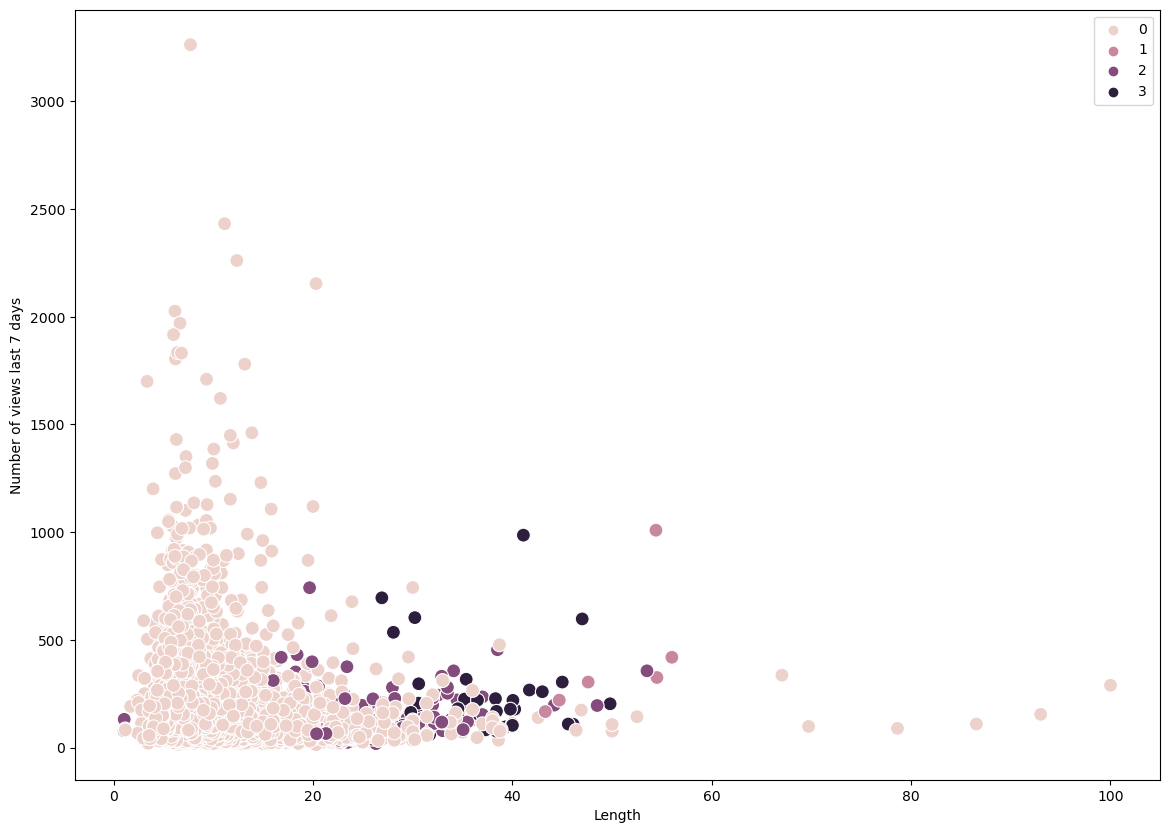

In [57]:
# Plot the clusters for the "Length" and "Number of views last 7 days" variables.

plt.figure(figsize=(14,10))
ax = sns.scatterplot(x=df_new['Length'], y=df_new['Number of views last 7 days'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Length') # Label x-axis.
plt.ylabel('Number of views last 7 days') # Label y-axis.
plt.show()

It is also somewhat hard to see clusters 1, 2, and 3, but it does seem that cluster 0 has the shortest boats in length overall, then cluster 2, then 3, then 1.

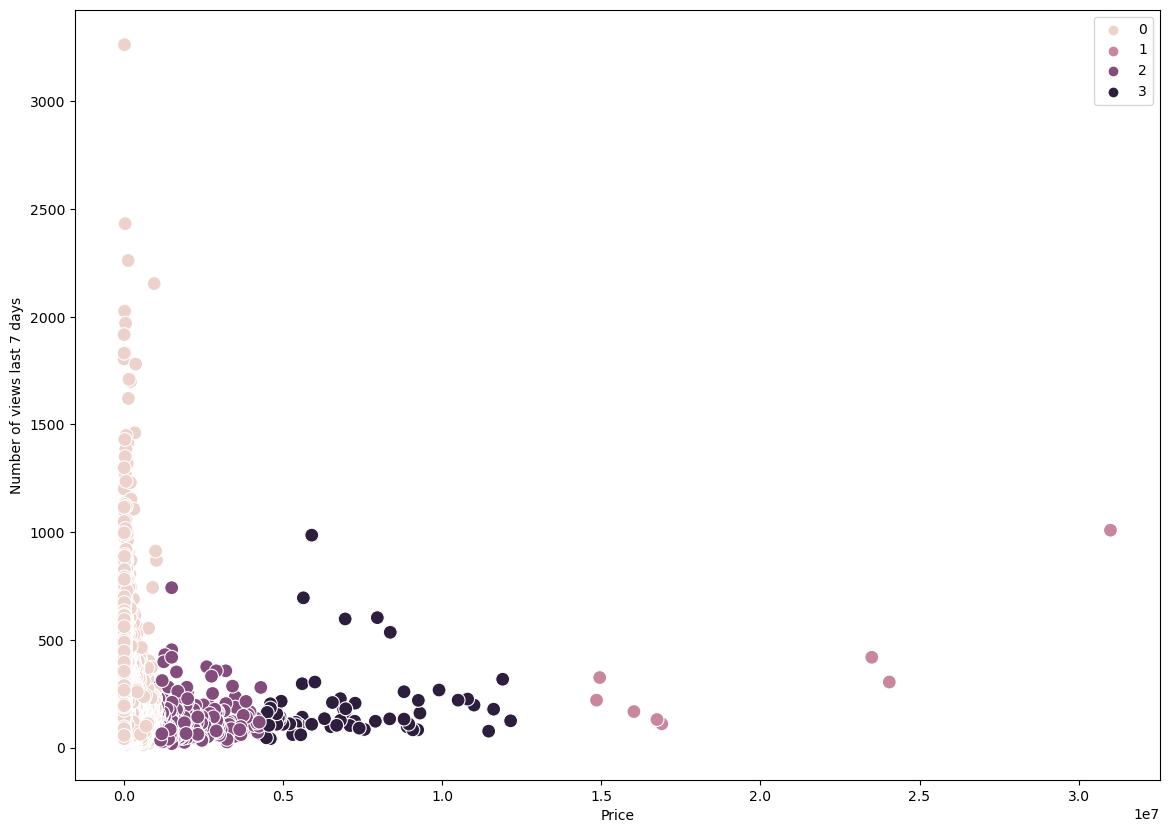

In [58]:
# Plot the clusters for the "Price" and "Number of views last 7 days" variables.

plt.figure(figsize=(14,10))
ax = sns.scatterplot(x=df_new['Price_adjusted'], y=df_new['Number of views last 7 days'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Price') # Label x-axis.
plt.ylabel('Number of views last 7 days') # Label y-axis.
plt.show()

Here it is easiest to see the separation of clusters. Obviously, boats in cluster 0 are the lowest in price, then cluster 2, then 3, then 1. The boats in cluster 0 have the most overall views. 

#### #9 Descriptive statistics

In [60]:
df_new.loc[df_new['clusters'] == 3, 'cluster'] = 'dark purple'
df_new.loc[df_new['clusters'] == 2, 'cluster'] = 'purple'
df_new.loc[df_new['clusters'] == 1, 'cluster'] = 'pink'
df_new.loc[df_new['clusters'] == 0, 'cluster'] = 'light pink'

In [62]:
df_new.groupby('cluster').agg({'Year Built':['mean', 'median'], 
                         'Length':['mean', 'median'], 
                         'Price_adjusted':['mean', 'median'],
                          'Number of views last 7 days':['mean', 'median']})

Year Built             Length         Price_adjusted  \
                    mean  median       mean  median           mean   
cluster                                                              
dark purple  2013.938462  2016.0  33.448000  31.700   6.977646e+06   
light pink   2004.519909  2007.0  11.041432  10.095   1.658650e+05   
pink         2014.375000  2020.0  47.100000  46.150   1.975312e+07   
purple       2012.378590  2013.0  22.804621  22.300   1.898560e+06   

                         Number of views last 7 days         
                  median                        mean median  
cluster                                                      
dark purple   6549005.76                  186.215385  133.0  
light pink      89000.00                  151.793288  109.0  
pink         16825000.00                  335.500000  262.0  
purple        1650000.00                  109.227154   91.0

On average, the pink cluster has the most views (mean and median). The characteristics of this group include also the highest number in the other categories - year built, length, and price. Therefore, the most desirable cluster is the newest boats with the longest length and highest price. 

On the other hand, the purple and light pink cluster have the fewest views. These clusters include on average the oldest boats with the shortest length and lowest price.

These results could be useful in recommending to users how to price their boat to garner the most views depending on its category (age and length of boat).